Churn Analysis : 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm

import seaborn as sn
from sklearn.metrics import roc_curve

In [4]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [78]:
df = pd.read_csv('data/churn_clean.csv')

In [6]:
df.info

<bound method DataFrame.info of       CaseOrder Customer_id                           Interaction  \
0             1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1             2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2             3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3             4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4             5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   
...         ...         ...                                   ...   
9995       9996     M324793  45deb5a2-ae04-4518-bf0b-c82db8dbe4a4   
9996       9997     D861732  6e96b921-0c09-4993-bbda-a1ac6411061a   
9997       9998     I243405  e8307ddf-9a01-4fff-bc59-4742e03fd24f   
9998       9999     I641617  3775ccfc-0052-4107-81ae-9657f81ecdf3   
9999      10000      T38070  9de5fb6e-bd33-4995-aec8-f01d0172a499   

                                   UID          City State  \
0     e885b299883d4f9fb18e39c75155d990   Point Baker    AK   
1     f2de8bef9

In [7]:
df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,...,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,...,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,...,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082813,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,...,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,...,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,...,200.734725,5586.141369,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,...,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [8]:
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [9]:
df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8'],
      dtype='object')

In [10]:
df.dtypes

CaseOrder                 int64
Customer_id              object
Interaction              object
UID                      object
City                     object
State                    object
County                   object
Zip                       int64
Lat                     float64
Lng                     float64
Population                int64
Area                     object
TimeZone                 object
Job                      object
Children                  int64
Age                       int64
Income                  float64
Marital                  object
Gender                   object
Churn                    object
Outage_sec_perweek      float64
Email                     int64
Contacts                  int64
Yearly_equip_failure      int64
Techie                   object
Contract                 object
Port_modem               object
Tablet                   object
InternetService          object
Phone                    object
Multiple                 object
OnlineSe

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [12]:
df.isna().any()

CaseOrder               False
Customer_id             False
Interaction             False
UID                     False
City                    False
State                   False
County                  False
Zip                     False
Lat                     False
Lng                     False
Population              False
Area                    False
TimeZone                False
Job                     False
Children                False
Age                     False
Income                  False
Marital                 False
Gender                  False
Churn                   False
Outage_sec_perweek      False
Email                   False
Contacts                False
Yearly_equip_failure    False
Techie                  False
Contract                False
Port_modem              False
Tablet                  False
InternetService         False
Phone                   False
Multiple                False
OnlineSecurity          False
OnlineBackup            False
DeviceProt

In [47]:
df['PaymentMethod'].unique()
paymentMethod = df['PaymentMethod'].value_counts().to_frame()


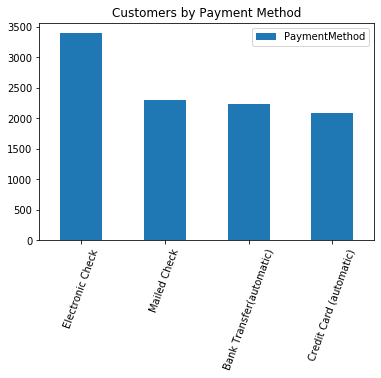

In [48]:
paymentMethod.plot.bar(rot=70, title="Customers by Payment Method")

In [15]:
df['Marital'].unique()

array(['Widowed', 'Married', 'Separated', 'Never Married', 'Divorced'],
      dtype=object)

In [17]:
df['Gender'].unique()

array(['Male', 'Female', 'Nonbinary'], dtype=object)

In [45]:
df['InternetService'].unique()
InternetService = df['InternetService'].value_counts().to_frame()


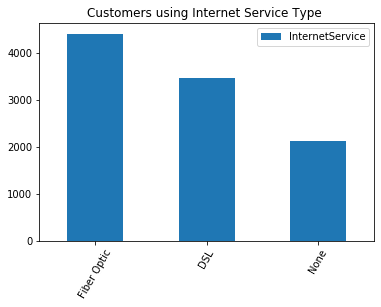

In [46]:
InternetService.plot.bar(rot=60, title='Customers using Internet Service Type ')

In [72]:
contractRate = df['Contract'].value_counts().to_frame()
contractRate.columns

Index(['Contract'], dtype='object')

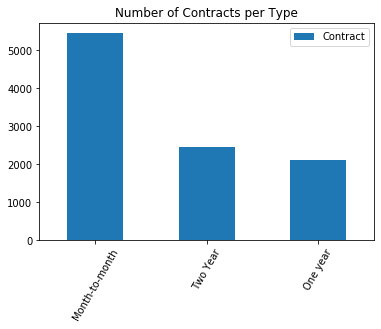

In [43]:
contractRate.plot.bar(rot=60, title="Number of Contracts per Type")

In [54]:
churnRate = df['Churn'].value_counts().to_frame()
churnRate
churnRate['Percentage'] = (churnRate['Churn']/churnRate['Churn'].sum())*100
churnRate

,Churn,Percentage
No,7350,73.5
Yes,2650,26.5


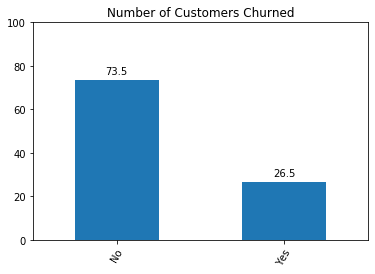

In [60]:
ax = churnRate['Percentage'].plot.bar(rot=60, title="Number of Customers Churned", ylim=(0,100))
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),(p.get_x() + p.get_width() /2., p.get_height()), ha = 'center', va='center', xytext =(0,9), textcoords = 'offset points')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020A3BC184C8>,
      dtype=object)

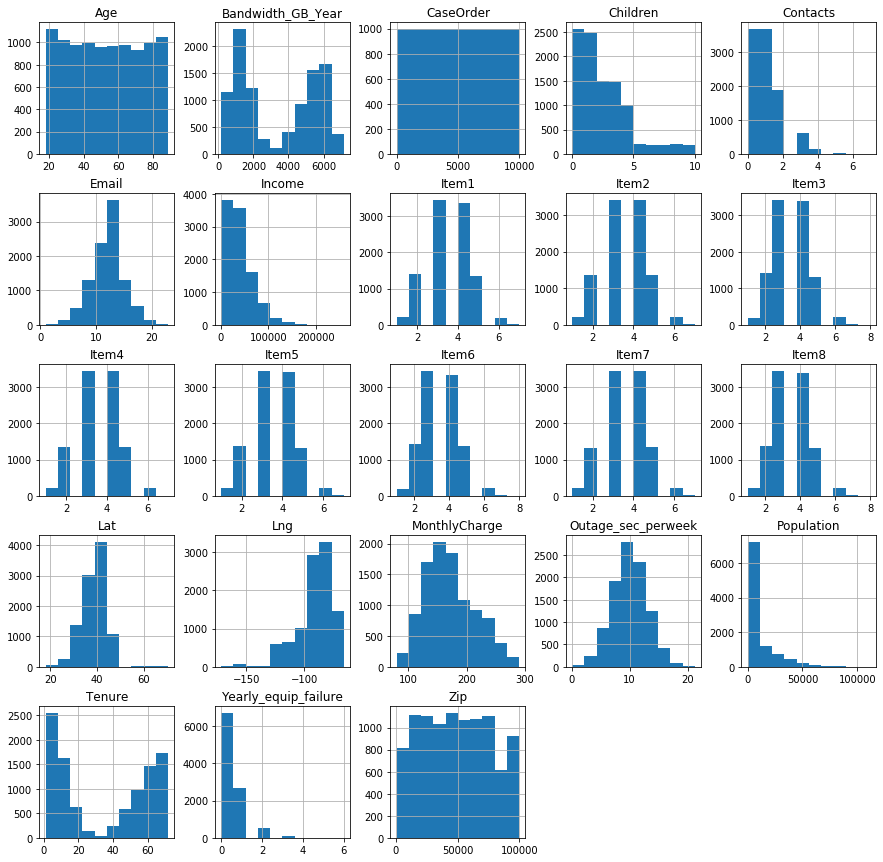

In [34]:
df.hist(figsize = (15,15))

Correlation of Features:

In [61]:
df.corr()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,1.000000,3.007020e-03,-0.014680,-0.001363,-0.007494,-0.006148,0.016038,0.000192,-0.001358,-0.011274,...,0.003677,0.825561,-0.004318,0.005959,0.003245,-5.640975e-03,0.016429,-0.007837,0.003595,-0.014840
Zip,0.003007,1.000000e+00,-0.042580,-0.901786,0.045138,-0.017205,-0.008135,0.002947,-0.011520,-0.007860,...,-0.008717,-0.002527,-0.026024,-0.003215,-0.019687,6.196497e-07,0.002923,0.007375,-0.005537,-0.002577
Lat,-0.014680,-4.257985e-02,1.000000,-0.100639,-0.220598,-0.000452,-0.002943,0.006563,0.004827,-0.030042,...,0.001406,-0.016949,0.005793,0.005380,-0.003421,1.101487e-02,-0.000464,-0.008726,0.006087,-0.019583
Lng,-0.001363,-9.017856e-01,-0.100639,1.000000,-0.048294,0.013634,0.012117,-0.002997,0.005646,0.007872,...,0.011765,0.003446,0.024389,0.003024,0.014966,-2.397805e-03,0.001366,-0.008770,0.001601,0.001912
Population,-0.007494,4.513808e-02,-0.220598,-0.048294,1.000000,-0.005877,0.010538,-0.008639,0.005483,0.017962,...,-0.004778,-0.003902,0.000618,-0.002571,0.001620,-8.272481e-03,0.006970,0.000834,-0.013062,0.008524
Children,-0.006148,-1.720505e-02,-0.000452,0.013634,-0.005877,1.000000,-0.029732,0.009942,0.001889,0.004479,...,-0.009781,0.025585,0.011470,0.013146,0.003394,-1.676831e-02,-0.000240,-0.000547,0.000687,-0.005236
Age,0.016038,-8.135285e-03,-0.002943,0.012117,0.010538,-0.029732,1.000000,-0.004091,-0.008047,0.001588,...,0.010729,-0.014724,-0.005972,0.006659,-0.003778,1.223656e-02,-0.008305,0.010635,0.005353,0.015193
Income,0.000192,2.946523e-03,0.006563,-0.002997,-0.008639,0.009942,-0.004091,1.000000,-0.010011,-0.009267,...,-0.003014,0.003674,-0.004009,0.007718,-0.002707,-2.274962e-02,0.011111,0.001768,0.016599,0.000740
Outage_sec_perweek,-0.001358,-1.152040e-02,0.004827,0.005646,0.005483,0.001889,-0.008047,-0.010011,1.000000,0.003994,...,0.020496,0.004176,-0.023338,-0.008076,-0.021366,-5.992006e-03,-0.004156,-0.014752,-0.020854,0.008126
Email,-0.011274,-7.860018e-03,-0.030042,0.007872,0.017962,0.004479,0.001588,-0.009267,0.003994,1.000000,...,0.001997,-0.014579,0.003709,0.001156,0.012928,9.150354e-04,-0.007929,0.014468,0.010010,-0.005857


HEATMAP DEVELOPMENT

turn Churn Contract and Payment Methods into numerical - OneHotEncoding?

In [89]:
df = pd.get_dummies(df, columns=['PaymentMethod','Churn'], prefix=['PayMethod','Churn'])

ONEHOTENCODING PaymentMethods Contract

In [85]:
df = pd.get_dummies(df, columns = ['Contract'],prefix="Contract")

In [182]:
df = pd.get_dummies(df, columns = ['Marital', 'InternetService','Port_modem','Phone','OnlineSecurity'],prefix=['Marital','Internet','modem','phone','security'])

In [185]:
df = pd.get_dummies(df, columns = ['OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies'],prefix=['Backup','Protection','TechSupport','StrTV','StrMovies'])

In [183]:
df

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,Marital_Widowed,Internet_DSL,Internet_Fiber Optic,Internet_None,modem_No,modem_Yes,phone_No,phone_Yes,security_No,security_Yes
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,1,0,1,0,0,1,0,1,0,1
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,0,0,1,0,1,0,0,1,0,1
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,1,1,0,0,0,1,0,1,1,0
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,0,1,0,0,1,0,0,1,0,1
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,0,0,1,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M324793,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,9499fb4de537af195d16d046b79fd20a,Mount Holly,VT,Rutland,5758,43.43391,-72.78734,...,0,1,0,0,0,1,0,1,1,0
9996,9997,D861732,6e96b921-0c09-4993-bbda-a1ac6411061a,c09a841117fa81b5c8e19afec2760104,Clarksville,TN,Montgomery,37042,36.56907,-87.41694,...,0,0,1,0,1,0,0,1,0,1
9997,9998,I243405,e8307ddf-9a01-4fff-bc59-4742e03fd24f,9c41f212d1e04dca84445019bbc9b41c,Mobeetie,TX,Wheeler,79061,35.52039,-100.44180,...,0,0,1,0,1,0,0,1,0,1
9998,9999,I641617,3775ccfc-0052-4107-81ae-9657f81ecdf3,3e1f269b40c235a1038863ecf6b7a0df,Carrollton,GA,Carroll,30117,33.58016,-85.13241,...,0,0,1,0,1,0,1,0,1,0


0       1
1       0
2       2
3       2
4       0
       ..
9995    0
9996    2
9997    0
9998    2
9999    0
Name: Contract, Length: 10000, dtype: int32

Text(0.5, 1, 'Correlation Heatmap')

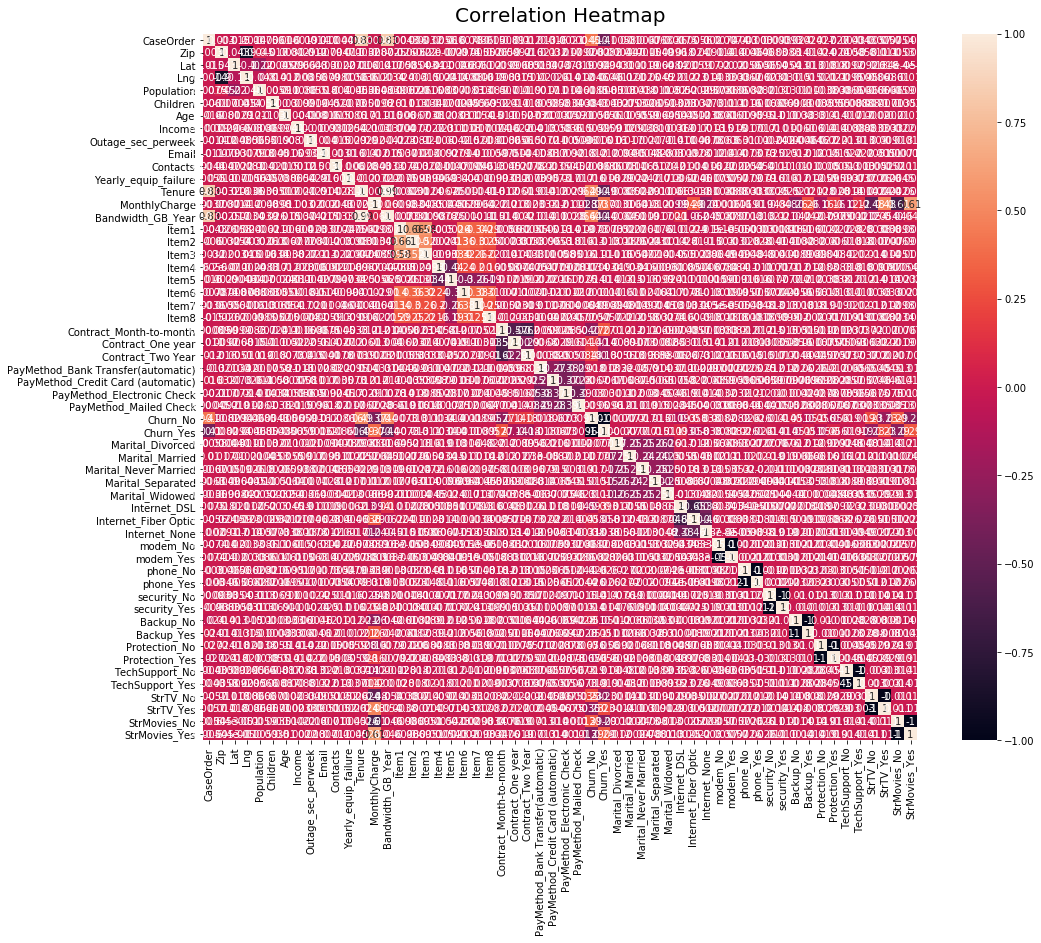

In [190]:
plt.figure(figsize= (16,13))
cor_map = sn.heatmap(df.corr(),vmin=-1, vmax=1, annot=True)
cor_map.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=12)

In [188]:
cor_map

Heatmap points out positive and negative correlations with CHURN for TENURE / MONTHLYCHARGE / BANDWIDTH  and lessor correlation with contract status (month2month, 1year, 2year)  Everything else is rather uncorrelated.

SO, Let's break Tenure into segments to see if there is a pattern.  As well as MonthlyCharges and BandwiDTH GB?YEAR.


In [96]:
df['MonthlyCharge']

0       172.455519
1       242.632554
2       159.947583
3       119.956840
4       149.948316
           ...    
9995    159.979400
9996    207.481100
9997    169.974100
9998    252.624000
9999    217.484000
Name: MonthlyCharge, Length: 10000, dtype: float64

In [117]:
x=df[['MonthlyCharge','Churn_Yes']]
x

,MonthlyCharge,Churn_Yes
0,172.455519,0
1,242.632554,1
2,159.947583,0
3,119.956840,0
4,149.948316,1
...,...,...
9995,159.979400,0
9996,207.481100,0
9997,169.974100,0
9998,252.624000,0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020A2A544908>,
      dtype=object)

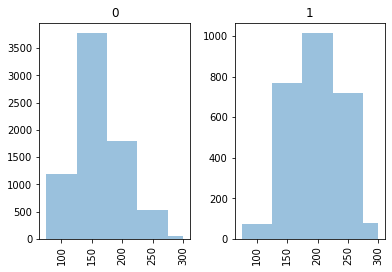

In [133]:
bins = [75,125,175,225,275,300]

x.hist(column='MonthlyCharge', bins=bins, by='Churn_Yes', alpha=0.45)

Text(0, 0.5, 'Number of Churns')

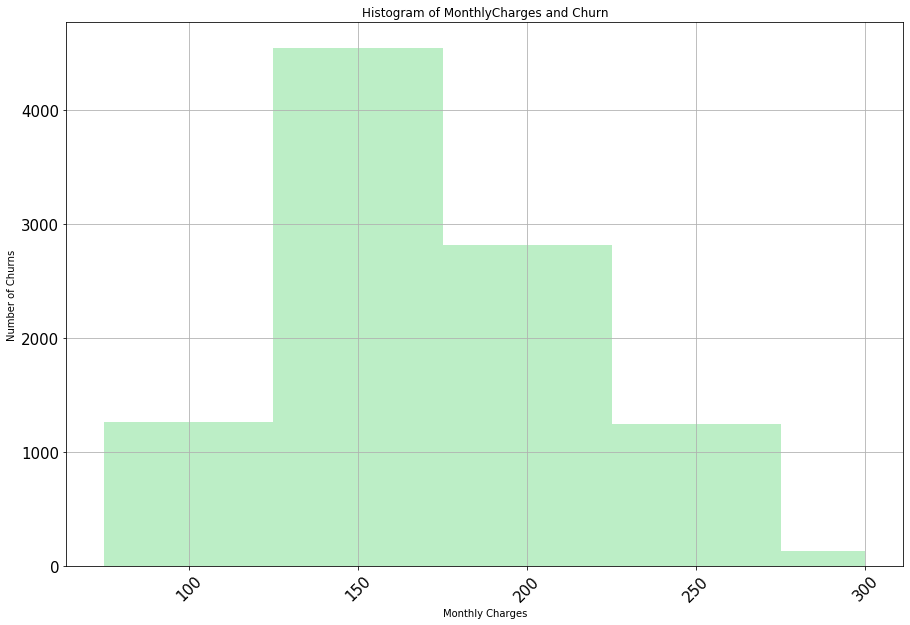

In [147]:
x.MonthlyCharge.plot(kind="hist", alpha=0.7, bins = bins, title="Histogram of MonthlyCharges", rot = 45, grid=True, figsize = (15,10), fontsize = 15, color=['#A0E8AF', '#FFCF56'])
plt.xlabel('Monthly Charges')
plt.ylabel('Number of Clients')

In [149]:
labels = [1,2,3,4,5]
x['binned'] = pd.cut(x['MonthlyCharge'], bins, labels = labels)

x

O:\Users\Joe\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,MonthlyCharge,Churn_Yes,binned
0,172.455519,0,2
1,242.632554,1,4
2,159.947583,0,2
3,119.956840,0,1
4,149.948316,1,2
...,...,...,...
9995,159.979400,0,2
9996,207.481100,0,3
9997,169.974100,0,2
9998,252.624000,0,4


In [172]:
x_churn = x.groupby(['binned']).sum()
x_churn.info()


<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 5 entries, 1 to 5
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MonthlyCharge  5 non-null      float64
 1   Churn_Yes      5 non-null      float64
dtypes: float64(2)
memory usage: 285.0 bytes


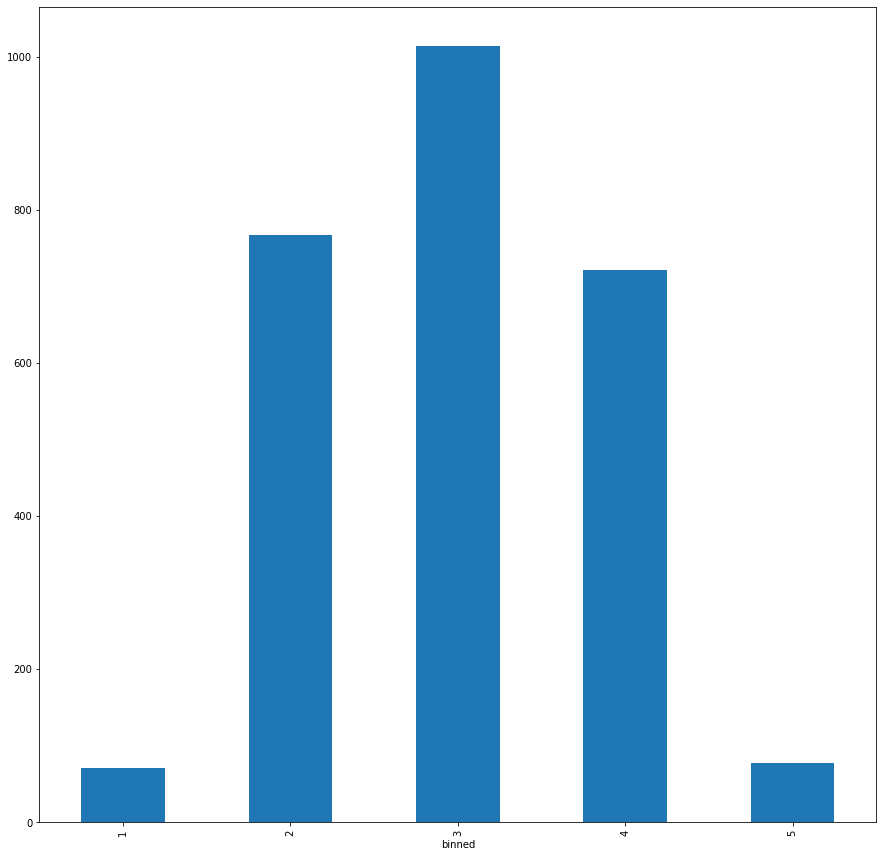

In [181]:
x_churn.Churn_Yes.plot.bar(figsize = (15,15))

Tenure Binning and Analysis

In [204]:
tenure_Churn=df[['Tenure','Churn_Yes']]
tenure_Churn


,Tenure,Churn_Yes
0,6.795513,0
1,1.156681,1
2,15.754144,0
3,17.087227,0
4,1.670972,1
...,...,...
9995,68.197130,0
9996,61.040370,0
9997,47.416890,0
9998,71.095600,0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020A6E03FDC8>,
      dtype=object)

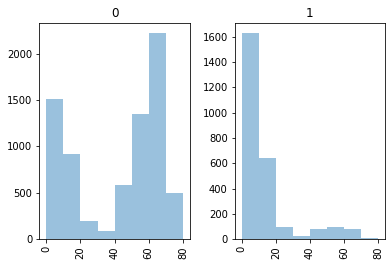

In [206]:
bins = [0,10,20,30,40,50,60,70,80]
tenure_Churn.hist(column='Tenure', bins=bins, by='Churn_Yes', alpha=0.45)

In [203]:
labels = [1,2,3,4,5,6,7,8]
tenure['binned'] = pd.cut(tenure, bins = bins,labels = labels)
tenure_churn = tenure.groupby(['binned']).sum()


TypeError: Cannot compare a Categorical for op __gt__ with a scalar, which is not a category.